# Partie C: Descente de gradient sur un modèle de régression polynomiale

Exemple de fonction:
    ![image](poly.png)

On a les formules suivantes:
![image](formule.png)

On va utiliser la forme matriciel!

![image](withMatrix.png)

In [107]:
import numpy as np # matrice
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

### Avec des fonctions déjâ implémenter

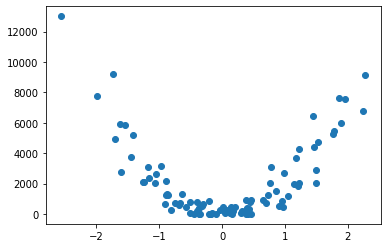

In [108]:
np.random.seed(0)
# DataSet
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y**2 # y ne varie plus linéairement selon x!
# On ajoute des variables polynômiales dans notre dataset
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x = poly_features.fit_transform(x)
plt.scatter(x[:,0],y)


Coeff R2= 0.8940616961411476


C:\Users\elitebook\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


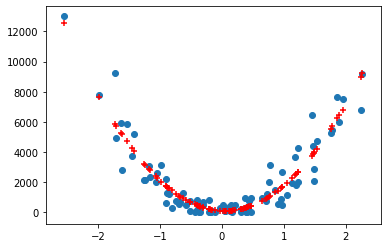

In [109]:
# On entraine le modele!
model = SGDRegressor(max_iter=1000, eta0=0.001)
model.fit(x,y)
print("Coeff R2=", model.score(x,y))

plt.scatter(x[:,0], y, marker='o')
plt.scatter(x[:,0], model.predict(x), c="r", marker='+')

### Implémentation from scratch!

In [67]:
np.random.seed(0)
# DataSet
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y**2 # y ne varie plus linéairement selon x!

On travaille avec des matrice! ```numpy.array```

In [78]:
X = np.array([i[0] for i in x])
Y = np.array(y)

In [79]:
theta0 = np.array([1, 2, 3]) # a, b, c
# On ajoute des variables polynômiales dans notre dataset (PolynomialFeatures)
X = [[i for i in X], [i**2 for i in X], [1 for i in range(len(X))]]
X = np.array(X)
theta0.shape

(3,)

In [80]:
X.shape

(3, 100)

###### 1. Calcule des dérivées partielles de la fonction E(a, b, c) selon a, b et c.

In [87]:
def gradient(X, Y, theta):
    somme = [0 for _ in range(len(Y))]
    somme = np.dot(theta, X) - Y
    somme = np.dot(X, somme)
    m = len(x)
    return somme/m

###### 2. Implémentation de l’algorithme DG.

In [110]:
def GD(nbrMax, epsilon, alpha, theta0, X, Y):
    theta = theta0 - alpha * gradient(X, Y, theta0)
    i = 1
    # conditions d'arret
    cond = True
    j = 0
    while j < len(theta):
        cond = cond and (abs(theta[j]-theta0[j])>epsilon)
        j += 1
    # iterations
    while cond and i < nbrMax:
        theta0 = theta.copy()
        theta = theta0 - alpha * gradient(X, Y, theta0)
        i += 1
        j = 0
        while j < len(theta):
            cond = cond and (abs(theta[j]-theta0[j])>epsilon)
            j += 1
    return (theta, i)

In [111]:
def E(theta, X, Y): # J: fonction coût
    somme = [0 for _ in range(len(Y))]
    somme = np.dot(X, theta) - Y
    somme = np.dot(somme, somme)
    somme = n.sum(somme)
    m = len(x)
    return somme/(2*m)

In [112]:
def F(theta, X):# fonction F
    somme = [0 for _ in range(len(X))]
    somme = np.dot(theta, X)
    return somme

###### <span style="color:green">• η = 0.01, nombremax = 1000 </span>. 

In [114]:
theta, itr = GD(nbrMax=1000, epsilon=0.01, alpha=0.1, theta0=theta0, X=X, Y=Y)

Nombre d'iterations: 101


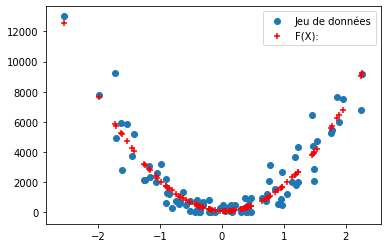

In [115]:
plt.scatter(X[0], Y, label="Jeu de données")
plt.scatter(X[0], F(theta, X), c='r', marker="+", label="F(X): ")
print("Nombre d'iterations:", itr)
plt.legend()
plt.show()

On constate que notre modèle est bon!
Aussi on obtient des résultats similaires avec les deux approximation!